In [32]:
import pandas as pd
data=pd.read_csv('data_assignment1.csv')
#Remove wrong data
data=data[data['Error.In.Data']==0]
print("Original data shape",data.shape)

Original data shape (125838, 38)


In [33]:
data.columns

Index(['Match', 'Date', 'Innings', 'Over', 'Runs', 'Total.Runs',
       'Innings.Total.Runs', 'Runs.Remaining', 'Total.Out',
       'Innings.Total.Out', 'Outs.Remaining', 'Wickets.in.Hand', 'Run.Rate',
       'Innings.Run.Rate', 'Run.Rate.Required', 'Initial.Run.Rate.Required',
       'Target.Score', 'Day-night', 'At.Bat', 'Fielding', 'Home.Team',
       'Away.Team', 'Stadium', 'Country', 'Total.Overs', 'Winning.Team',
       'Toss.Winner', 'at.bat.wins', 'at.bat.won.toss', 'at.bat.at.home',
       'at.bat.bat.first', 'chose_bat_1st', 'chose_bat_2nd', 'forced_bat_1st',
       'forced_bat_2nd', 'new.game', 'Error.In.Data', 'common.support'],
      dtype='object')

In [34]:
#getting the number of matches in remaining data
num_matches=len(set(data['Match']))
print("Number of matches:",num_matches)

Number of matches: 1412


In [35]:
#filter data by first innings and project only relevant columns
filtered_data=data[data['Innings']==1]
filtered_data=filtered_data[['Match','Innings','Over','Total.Runs','Total.Out','Innings.Total.Runs','Wickets.in.Hand']]

In [36]:
filtered_data.head(n=100)

,Match,Innings,Over,Total.Runs,Total.Out,Innings.Total.Runs,Wickets.in.Hand
0,65193,1,1,4,0,204,10
1,65193,1,2,6,0,204,10
2,65193,1,3,9,0,204,10
3,65193,1,4,20,0,204,10
4,65193,1,5,37,0,204,10
5,65193,1,6,40,0,204,10
6,65193,1,7,42,1,204,9
7,65193,1,8,43,1,204,9
8,65193,1,9,50,1,204,9
9,65193,1,10,50,2,204,8


In [37]:
print("Filtered Data shape",filtered_data.shape)

Filtered Data shape (67288, 7)


In [38]:
'''
u: overs to go
w: wickets in hand
R: runs scored from that point onwards
z0_L: parameters of model
'''
import numpy as np
#z0_L denotes 11 parameters : Z(1),...,Z(10) and L in this order
z0_L=np.random.rand(11)

#returns run scoring potential given u overs to go,w wickets in hand and 11 parameters
def Z(u,w,z0_L):
    z_indx=w-1#to correctly index onto the right parameter acc to wicket in hand
    return z0_L[z_indx]*(1-np.exp(-(z0_L[10]*u)/z0_L[z_indx])) # Implementation of model foumula Z(u,w;theta)=Z(W)(1-exp(-Lu/Z(w)))

#returns y-Z(u,w,theta) or the residual. Numpy automatically squares this to fit least square sum.
def residual(z0_L,u,w,R):
    return Z(u,w,z0_L)-R

In [39]:
u_train=50-filtered_data['Over'].values #overs to go
w_train=filtered_data['Wickets.in.Hand'].values #wickets in hand
R_train=filtered_data['Innings.Total.Runs'].values-filtered_data['Total.Runs'].values #Runs scored from data point onwards

In [40]:
from scipy.optimize import least_squares
res_lsq = least_squares(residual, z0_L, args=(u_train,w_train,R_train)) #library fn to minimize least sq error sum

In [41]:
print("Initial params (Z1 to Z10 and L):",z0_L)

Initial params (Z1 to Z10 and L): [0.50144345 0.55336068 0.9260405  0.3386885  0.85732666 0.1789728
 0.63517696 0.88677681 0.17595673 0.35494436 0.44062212]


In [42]:
print("Trained params (Z1 to Z10 and L):",res_lsq.x) 

Trained params (Z1 to Z10 and L): [ 11.6954684   26.85675083  50.74649458  78.75252516 104.05545938
 137.91324098 169.20830531 207.69468108 239.49329795 284.89054355
  10.84280605]


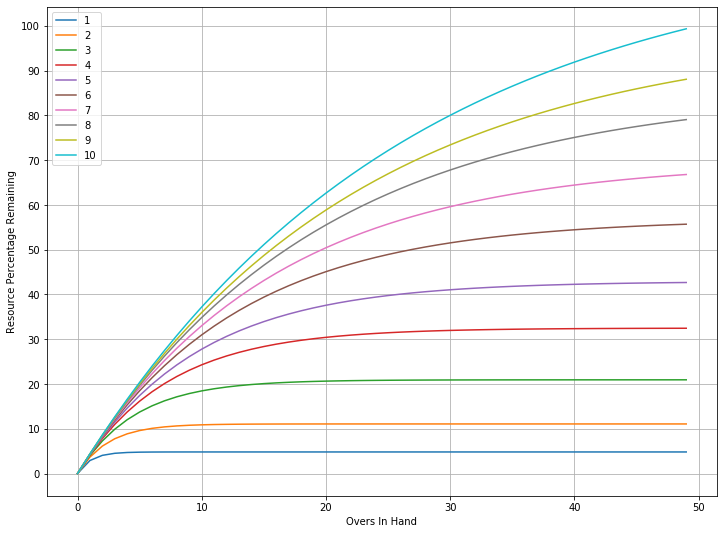

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
for wickets_in_hand in range(1,11):
    x=np.arange(50)
    y=(Z(np.arange(50),wickets_in_hand,res_lsq.x)/Z(50,10,res_lsq.x))*100
    plt.plot(x,y,label=str(wickets_in_hand))
plt.xlabel('Overs In Hand')
plt.ylabel('Resource Percentage Remaining')
plt.legend()
plt.yticks(np.arange(0, 101, 10)) 
plt.grid()
plt.show()

In [14]:
print("Cost at solution:",res_lsq.cost)

Cost at solution: 52209037.688421845
